## Different blurs

<Figure size 1000x600 with 0 Axes>

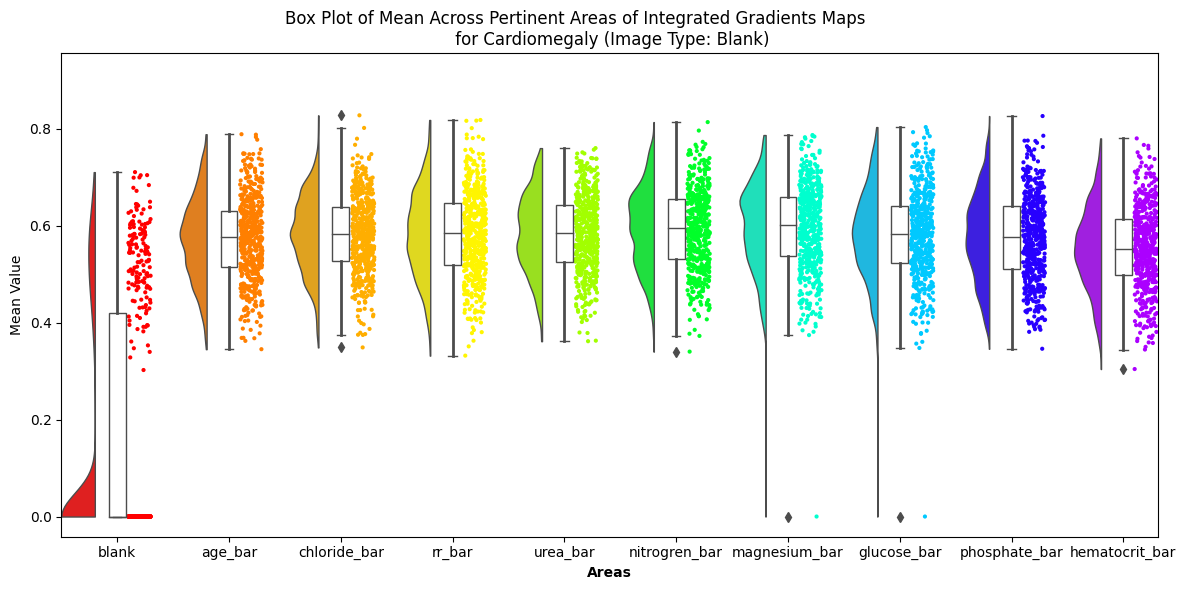

In [16]:
# python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=0 --debug --idp
#raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 0

<Figure size 1000x600 with 0 Axes>

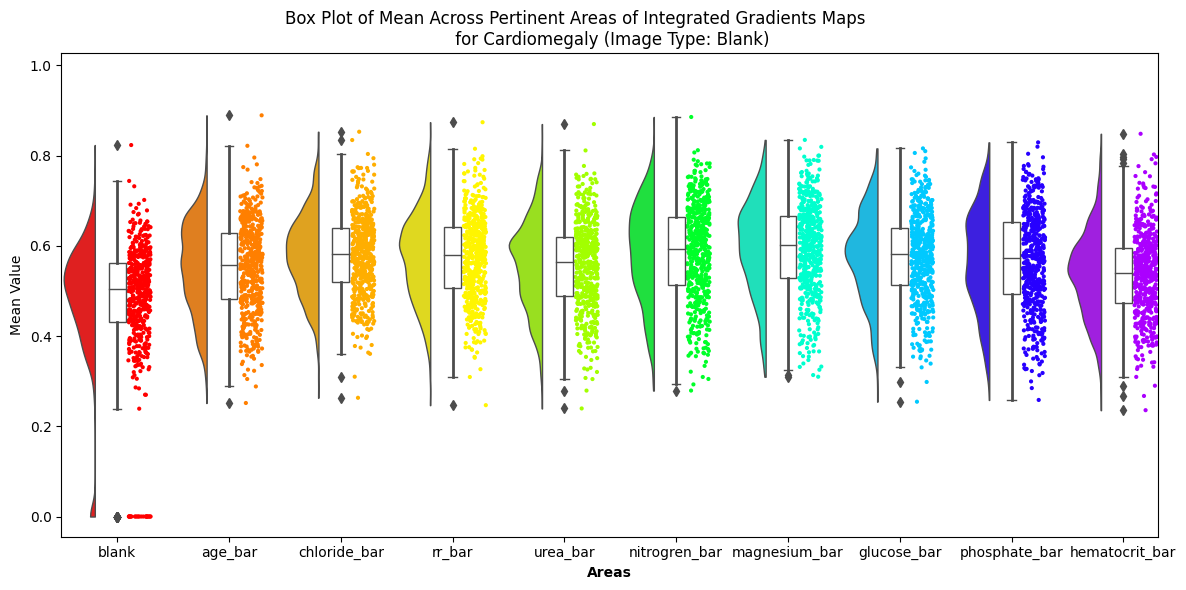

In [17]:
# python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=1 --debug --idp
#raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 1

<Figure size 1000x600 with 0 Axes>

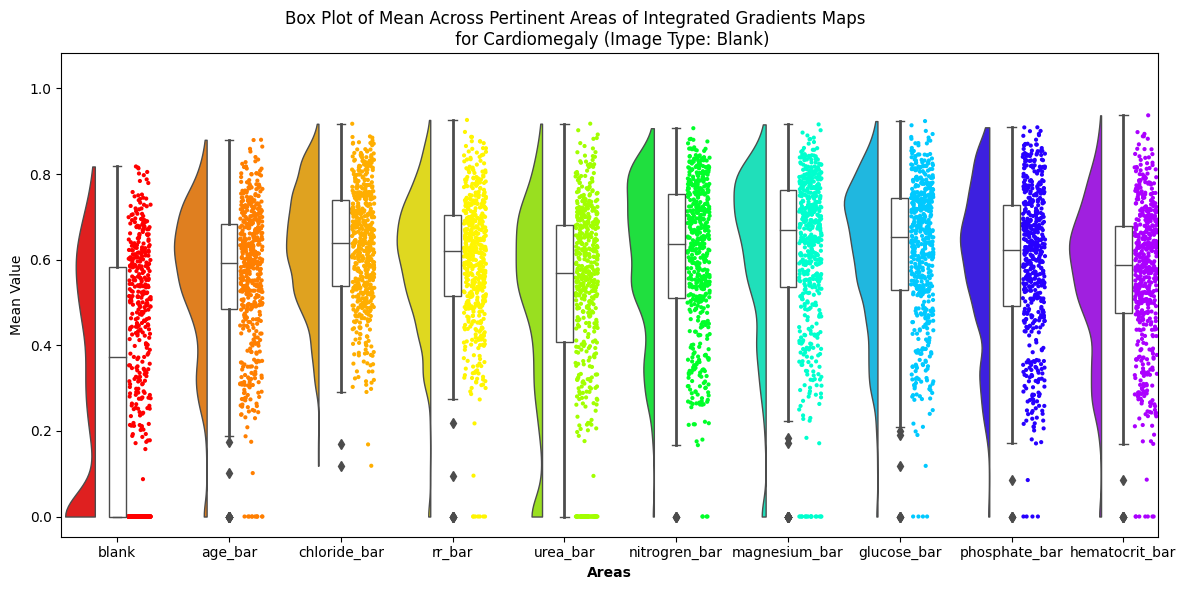

In [18]:
# python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=2 --debug --idp
#raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 2

<Figure size 1000x600 with 0 Axes>

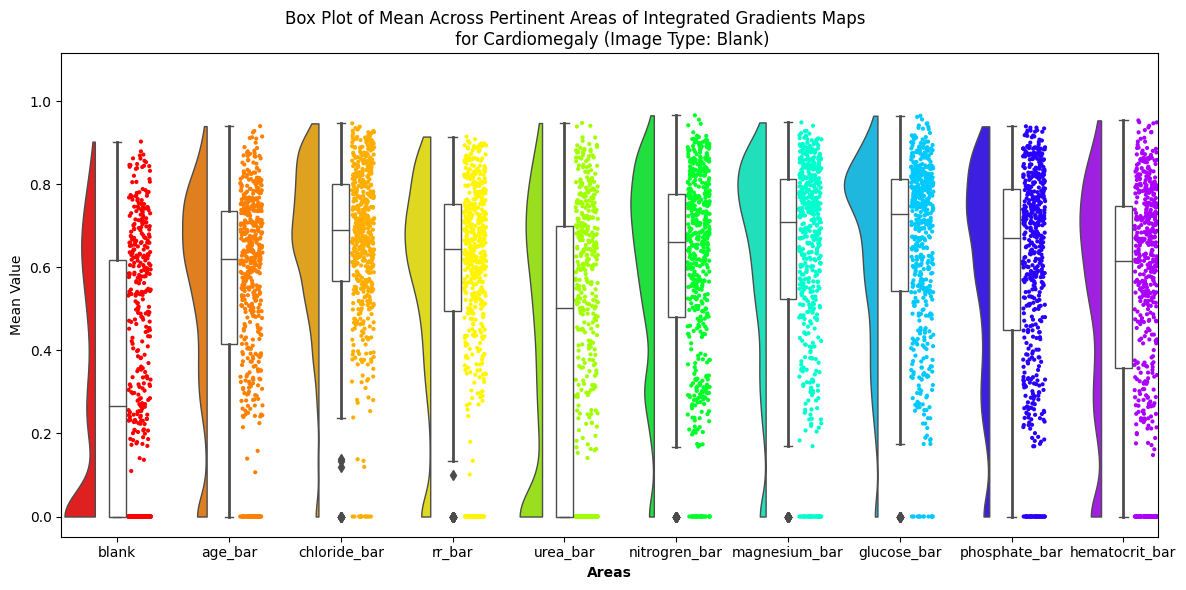

In [20]:
# python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=3 --debug --idp
#raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 3

<Figure size 1000x600 with 0 Axes>

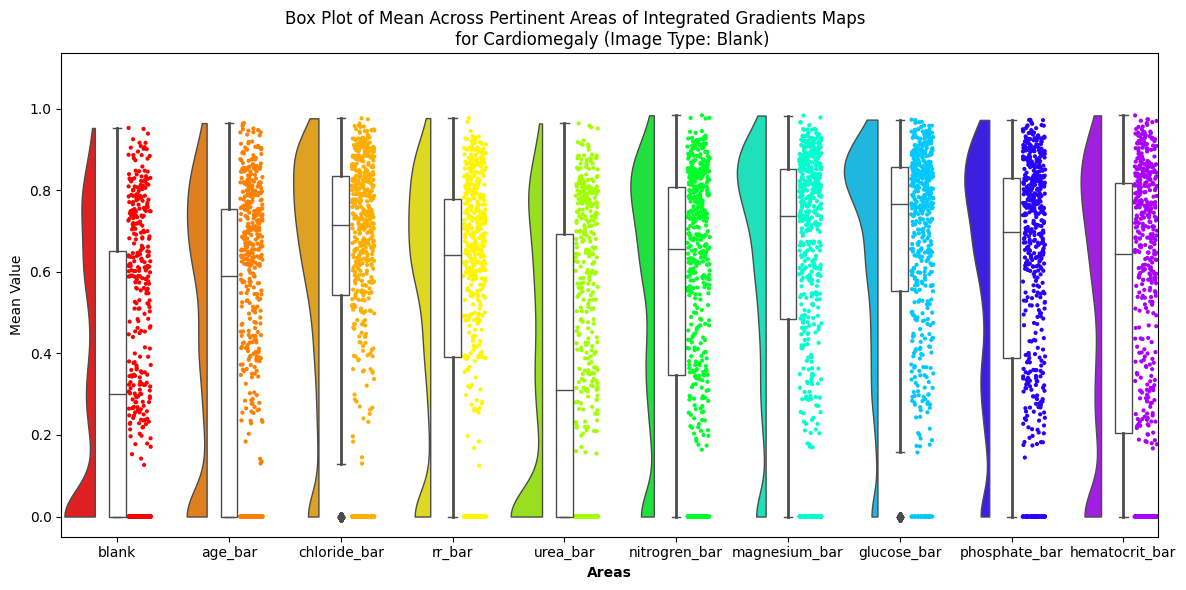

In [21]:
#python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=4 --debug --idp
#raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 4

<Figure size 1000x600 with 0 Axes>

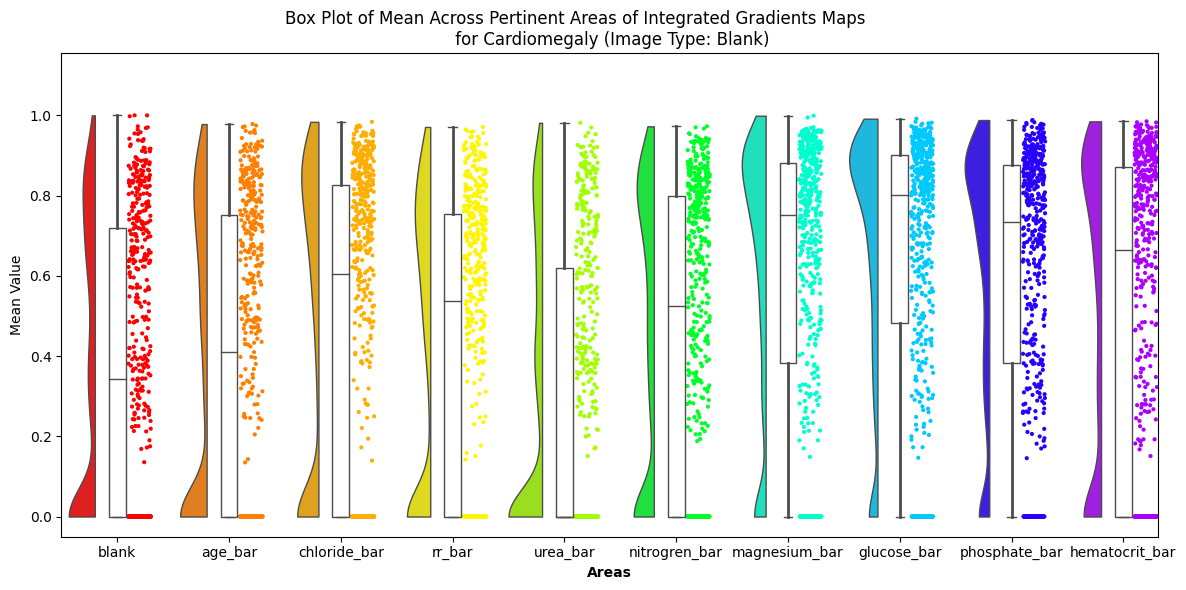

In [22]:
#python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=5 --debug --idp
#raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 5

## Weighted Rainclouds

<Figure size 1000x600 with 0 Axes>

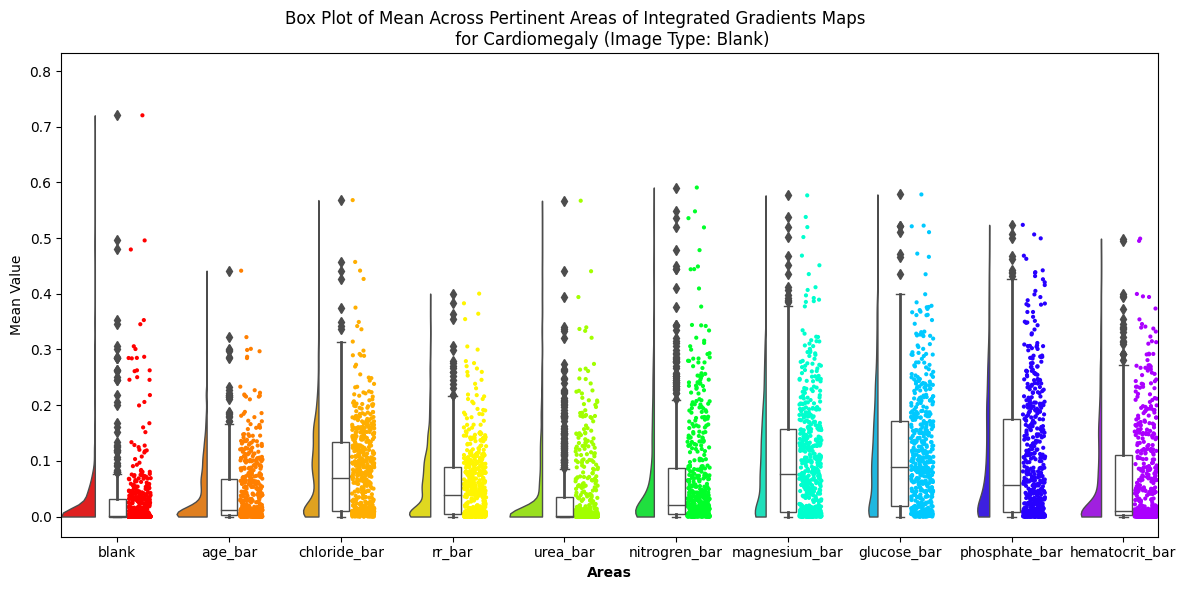

In [3]:
# python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=3 --debug --idp
image_type='blank'
mask_type = 'ig'
label = 'Cardiomegaly'
order, suffix = get_barcode_order_info(order=None, no_bars=False, nan=False)
raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 3

<Figure size 1000x600 with 0 Axes>

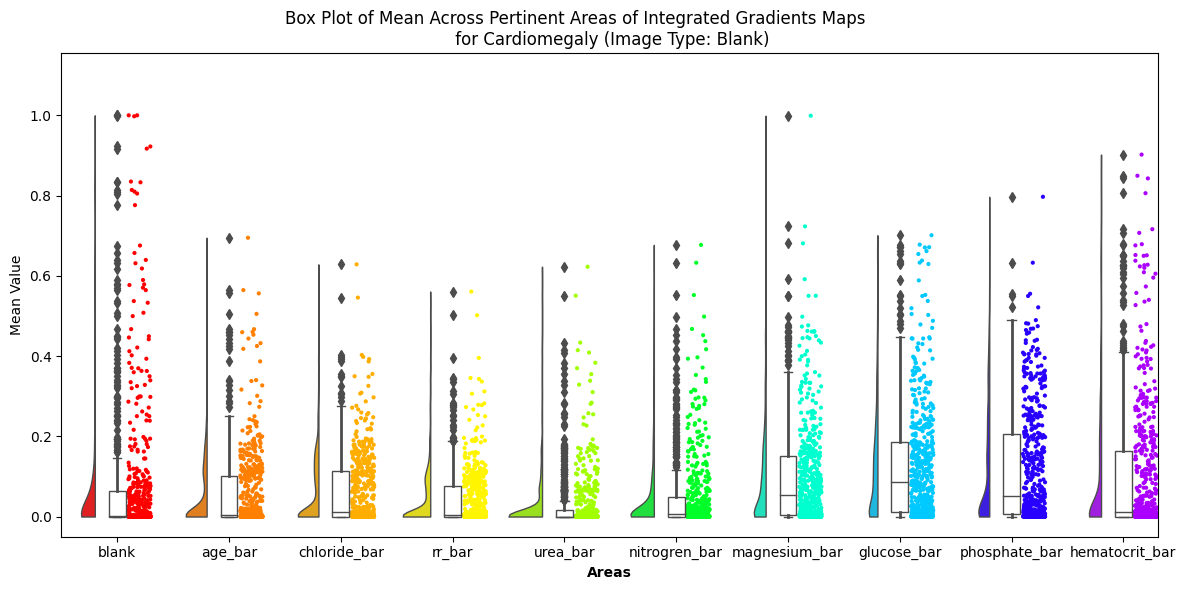

In [4]:
# python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --blur=3 --debug --idp
image_type='blank'
mask_type = 'ig'
label = 'Cardiomegaly'
order, suffix = get_barcode_order_info(order=None, no_bars=False, nan=False)
raincloud(image_type, suffix, mask_type, label, run_id=None, debug=True, verbose=True) # blur 3

In [10]:
import numpy as np
import pandas as pd
def group_stats_debug(stats_df):
    # Assuming df is your dataframe
    def std_err(x):
        return np.std(x) / np.sqrt(len(x))

    # Group by 'area' and aggregate statistics
    grouped_df = stats_df.groupby('area').agg({
        'mean': ['mean', 'min', 'max', std_err],
        'mean_w_frac': ['mean', 'min', 'max', std_err],
        'mean_w_iou': ['mean', 'min', 'max', std_err],
        'min': ['mean', 'min', 'max', std_err],
        '25th_percentile': ['mean', 'min', 'max', std_err],
        'median': ['mean', 'min', 'max', std_err],
        '75th_percentile': ['mean', 'min', 'max', std_err],
        'max': ['mean', 'min', 'max', std_err],
        'std_mean': ['mean', 'min', 'max', std_err],
        'std_median': ['mean', 'min', 'max', std_err],
        'fraction_attn_area': ['mean', 'min', 'max', std_err],
        'iou': ['mean', 'min', 'max', std_err]
    })

    # Flatten the column hierarchy for readability
    grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]

    return grouped_df

In [11]:
image_type='blank'
stats_df = get_mask_stats_csv(image_type, suffix, 'saliency', label)
grouped_df = group_stats_debug(stats_df)
grouped_df[grouped_df.columns[8:12:3].append(grouped_df.columns[4:8:3]).append(grouped_df.columns[0:4:3])].sort_values(by='mean_w_iou_mean', ascending=False)

,mean_w_iou_mean,mean_w_iou_std_err,mean_w_frac_mean,mean_w_frac_std_err,mean_mean,mean_std_err
area,,,,,,
glucose_bar,0.108672,0.006105,0.149006,0.008179,0.632065,0.015394
hematocrit_bar,0.092189,0.007386,0.118327,0.008898,0.456379,0.017724
chloride_bar,0.086688,0.005080,0.100432,0.005598,0.537453,0.017291
phosphate_bar,0.078883,0.004962,0.101184,0.005912,0.574204,0.015817
rr_bar,0.060952,0.004230,0.072584,0.004698,0.500119,0.016618
magnesium_bar,0.060689,0.004505,0.086320,0.005952,0.544651,0.016251
age_bar,0.038058,0.002851,0.042533,0.003165,0.374540,0.017073
urea_nitrogen_bar,0.037334,0.003823,0.046366,0.004611,0.314837,0.016155
blank,0.006727,0.000620,0.106792,0.008722,0.416135,0.016364


In [12]:
stats_df = get_mask_stats_csv(image_type, suffix, 'ig', label)
grouped_df = group_stats_debug(stats_df)
grouped_df[grouped_df.columns[8:12:3].append(grouped_df.columns[4:8:3]).append(grouped_df.columns[0:4:3])].sort_values(by='mean_w_iou_mean', ascending=False)

,mean_w_iou_mean,mean_w_iou_std_err,mean_w_frac_mean,mean_w_frac_std_err,mean_mean,mean_std_err
area,,,,,,
glucose_bar,0.120008,0.006057,0.155956,0.007594,0.662200,0.013246
hematocrit_bar,0.107793,0.007284,0.126037,0.008235,0.535429,0.016112
phosphate_bar,0.107499,0.005498,0.129656,0.006073,0.632839,0.013440
chloride_bar,0.066250,0.004258,0.075643,0.004756,0.466015,0.016385
magnesium_bar,0.057713,0.004173,0.080427,0.005396,0.558531,0.014613
rr_bar,0.050895,0.003431,0.059072,0.003912,0.474364,0.015419
urea_nitrogen_bar,0.032293,0.003371,0.038843,0.003915,0.326450,0.015016
age_bar,0.026752,0.002228,0.030263,0.002466,0.326545,0.015195
blank,0.004096,0.000445,0.076240,0.007329,0.371082,0.015277


In [13]:
image_type='xray'
stats_df = get_mask_stats_csv(image_type, suffix, 'saliency', label)
grouped_df = group_stats_debug(stats_df)
grouped_df[grouped_df.columns[8:12:3].append(grouped_df.columns[4:8:3]).append(grouped_df.columns[0:4:3])].sort_values(by='mean_w_iou_mean', ascending=False)

,mean_w_iou_mean,mean_w_iou_std_err,mean_w_frac_mean,mean_w_frac_std_err,mean_mean,mean_std_err
area,,,,,,
xray,0.066630,0.000484,0.551013,0.003987,0.558124,0.003985
glucose_bar,0.001245,0.000355,0.001387,0.000387,0.027941,0.005228
age_bar,0.001106,0.000220,0.001201,0.000235,0.088443,0.008346
hematocrit_bar,0.001088,0.000364,0.001189,0.000389,0.021400,0.004523
chloride_bar,0.000943,0.000229,0.001089,0.000258,0.046058,0.006329
phosphate_bar,0.000587,0.000196,0.000670,0.000216,0.023282,0.004613
magnesium_bar,0.000473,0.000286,0.000530,0.000304,0.017968,0.004257
rr_bar,0.000260,0.000143,0.000298,0.000157,0.018918,0.004187
urea_nitrogen_bar,0.000066,0.000031,0.000079,0.000038,0.007216,0.002565


In [14]:
stats_df = get_mask_stats_csv(image_type, suffix, 'ig', label)
grouped_df = group_stats_debug(stats_df)
grouped_df[grouped_df.columns[8:12:3].append(grouped_df.columns[4:8:3]).append(grouped_df.columns[0:4:3])].sort_values(by='mean_w_iou_mean', ascending=False)

,mean_w_iou_mean,mean_w_iou_std_err,mean_w_frac_mean,mean_w_frac_std_err,mean_mean,mean_std_err
area,,,,,,
xray,0.070338,0.000491,0.582313,0.004014,0.596533,0.003896
glucose_bar,0.004851,0.000779,0.005299,0.000830,0.073177,0.008108
age_bar,0.001483,0.000214,0.001631,0.000231,0.134941,0.010343
magnesium_bar,0.001330,0.000355,0.001564,0.000404,0.038670,0.006135
chloride_bar,0.001155,0.000311,0.001331,0.000336,0.074634,0.008198
phosphate_bar,0.001140,0.000316,0.001291,0.000347,0.046255,0.006572
hematocrit_bar,0.000922,0.000328,0.001022,0.000357,0.014972,0.003883
rr_bar,0.000566,0.000231,0.000641,0.000255,0.036811,0.006101
urea_nitrogen_bar,0.000297,0.000163,0.000333,0.000181,0.007404,0.002618


## Run from here!

In [7]:
# make sure to use the ptitvenv environment
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
from mimic_constants_ptit import get_mask_stats_csv, home_out_dir, get_barcode_order_info, stats_header, stats_header_debug
from os import makedirs
#from mimic_constants import *

mask_type_strs = {'ig': 'Integrated Gradients', 'saliency': 'Saliency'}
def get_stat_name(stat):
    if stat == 'mean_w_frac':
        return 'Mean (weighted by frac of attention in bar)'
    if stat == 'mean_w_iou':
        return 'Mean (weighted by IoU)'
    if stat == 'std_mean':
        return 'Mean SD'
    if stat == 'std_median':
        return 'Median SD'
    return stat.replace('_', ' ').title()

In [ ]:
#python mimic_update_mask_stats.py --image_type='blank' --batch_size=100 --mask_type='ig' --to_ignore=25 --debug --idp

In [8]:
def raincloud(image_type, suffix, mask_type, label, run_id=None, debug=False, verbose=False):
    stats_df = None
    if debug and verbose:
        stats_df = pd.read_csv(f'notebooks/{image_type}.csv', names=stats_header_debug)        
    else:
        stats_df = get_mask_stats_csv(image_type, suffix, mask_type, label)
    
    save_dir_1 = home_out_dir / f"saliency_viz/{image_type}-{suffix}/{mask_type}/{label.lower().replace(' ', '_')}"
    
    if not verbose:
        makedirs(save_dir_1, exist_ok=True)
        #makedirs(save_dir_2, exist_ok=True)

    mask_type_str = mask_type_strs[mask_type]
    statistics = ['mean', 'median', 'min', '25th_percentile', '75th_percentile', 'max', 'std_mean', 'std_median']
    if debug:
        statistics = ['mean', 'mean_w_frac', 'mean_w_iou', 'median', 'min', '25th_percentile', '75th_percentile', 'max', 'std_mean', 'std_median']
    if debug and verbose:
        statistics = ['mean', 'mean_w_frac', 'mean_w_iou']

    for orient, fig_dimensions in zip(['v', 'h'], [(12, 6), (6, 6)]):
        if orient == 'h':
            continue        
        
        for idx, stat in enumerate(statistics):
            plt.figure(figsize=(10, 6))
            # Define color palette for the plot
            colors = ['#ff0000', '#ff7f00', '#ffae00', '#fff500', '#a2ff00', '#00ff29', '#00ffce', '#00c9ff', '#2700ff', '#ab00ff']    
            # Create figure and axis objects
            fig, ax = plt.subplots(figsize=fig_dimensions)

            # Define the line width properties
            # line_width_props = {
            #     'whiskerprops': {'linewidth': 2},
            #     'capprops': {'linewidth': 2},
            #     'boxprops': {'linewidth': 2},
            # }
            # Generate the raincloud plot
            pt.RainCloud(x="area", y=stat, data=stats_df, palette=colors, 
                        bw=.2, 
                        ax=ax, orient=orient,
                        box_linewidth=1,  # Modify the boxplot linewidth
                        offset=.2,  # Adjust the cloud position
                        move=.2,  # Adjust the rain position
                        width_viol=.6,  # Reduce violin width
                        )

            # Adjust the plot margins to prevent cutting off the rightmost rain only for vertical orientation
            # Adjust the y-axis limits to show the full peak
            if orient == 'v':
                plt.subplots_adjust(right=0.95)  # Increase right margin for vertical orientation
                y_min, y_max = ax.get_ylim()
                ax.set_ylim(y_min, y_max * 1.1)  # Increase the upper limit by 10%

            plt.title(f"Box Plot of {get_stat_name(stat)} Across Pertinent Areas of {mask_type_str} Maps \
            \n for {label.capitalize()} (Image Type: {image_type.capitalize()})")
            #, Barcode Order: {suffix.replace('_', ', ')} \
            plt.ylabel(f"{stat.capitalize()} Value")
            plt.xlabel('Areas', fontweight='bold')
            plt.tight_layout()
            
            if verbose:
                plt.show()
            else:
                fname = f"{idx}_raincloud_{stat}.pdf"
                if orient == 'v':
                    fname = fname.replace('.pdf', '_vertical.pdf')
                elif orient == 'h':
                    fname = fname.replace('.pdf', '_horizontal.pdf')    
                plt.savefig(save_dir_1/fname, bbox_inches='tight', dpi=300)
                #plt.savefig(save_dir_2/fname, bbox_inches='tight', dpi=300)
                plt.close()

In [ ]:
image_type='blank'
mask_type = 'ig'
label = 'Cardiomegaly'
order, suffix = get_barcode_order_info(order=None, no_bars=False, nan=False)
raincloud(image_type, suffix, mask_type, label, run_id=None, verbose=True)

In [9]:
label = 'Cardiomegaly'
order, suffix = get_barcode_order_info(order=None, no_bars=False, nan=False)
raincloud('blank', suffix, 'saliency', label, run_id=None, verbose=False, debug=True)
raincloud('xray', suffix, 'saliency', label, run_id=None, verbose=False, debug=True)
raincloud('noise', suffix, 'saliency', label, run_id=None, verbose=False, debug=True)
raincloud('xray', suffix, 'ig', label, run_id=None, verbose=False, debug=True)
raincloud('blank', suffix, 'ig', label, run_id=None, verbose=False, debug=True)
raincloud('noise', suffix, 'ig', label, run_id=None, verbose=False, debug=True)

/tmp/ipykernel_9588/733328177.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=fig_dimensions)
/tmp/ipykernel_9588/733328177.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>